## Exercise 2

For this exercise , you will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in Data Analytics! 

The Dataset has been given to you on D2L. You need to download the .csv file from your assignment folder. The above link is just for a reference story about the data. 


1- For this assignment, you need to perform explorotary data analysis and answer at least three hypotheses based on the dataset. You may need to use your knowledge of statiscts to analyze this data.

Here are three possible hypotheses that you can define for this dataset (you can define your own hypotheses as well):

- Determine if the survival rate is associated to the class of passenger
- Determine if the survival rate is associated to the gender
- Determine the survival rate is associated to the age



2- For each hypothesis, you need to make at least one plot. 

3- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 2 of your assignment, you need to submit one jupyter notebook file and one pdf file.

This will be your first end to end data analysis project. For this assignment, you will be graded on you overall analysis, and your final report.


4- Push your code and project to github and provide the link to your code here.



Ensure that your github project is organized to at least couple of main folders, ensure that you have the README file as well:

- Src
- Data
- Docs
- Results

Read this link for further info:  https://gist.github.com/ericmjl/27e50331f24db3e8f957d1fe7bbbe510

## Answer

Github project link: https://github.com/andynth13/Assignment-3.git

### Clean up data

Replace Passenger class in number with the class name for easily read

In [39]:
class_dict = {1: 'First Class', 2: 'Second Class', 3: 'Third Class'}
data['Pclass'] = data['Pclass'].replace(class_dict)

Replace Survived from boolean number to string 0 = Not Survived and 1 = Survived

In [24]:
class_dict2 = {0: 'Not Survived', 1: 'Survived'}
data['Survived'] = data['Survived'].replace(class_dict2)

In [40]:
import pandas as pd
import numpy as npj

In [41]:
data = pd.read_csv('titanic.csv')

In [42]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Hypothesis 1: Determine if the survival rate is associated with the class of passenger

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Replace Passenger class in number with the class name for easily read

In [45]:
class_dict = {1: 'First Class', 2: 'Second Class', 3: 'Third Class'}
data['Pclass'] = data['Pclass'].replace(class_dict)

Plot the distribution of cabin class

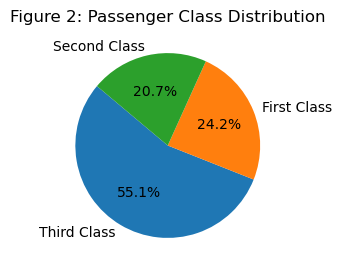

In [46]:
class_distr = data['Pclass'].value_counts()
plt.figure(figsize=(6, 3))
plt.pie(class_distr, labels = class_distr.index, autopct='%1.1f%%', startangle=140)
plt.title('Figure 2: Passenger Class Distribution')
plt.show()

Plot the survival rate by passenger

In [47]:
sur_class = pd.crosstab(data['Pclass'], data['Survived'])
sur_class

Survived,0,1
Pclass,,
First Class,80,136
Second Class,97,87
Third Class,372,119


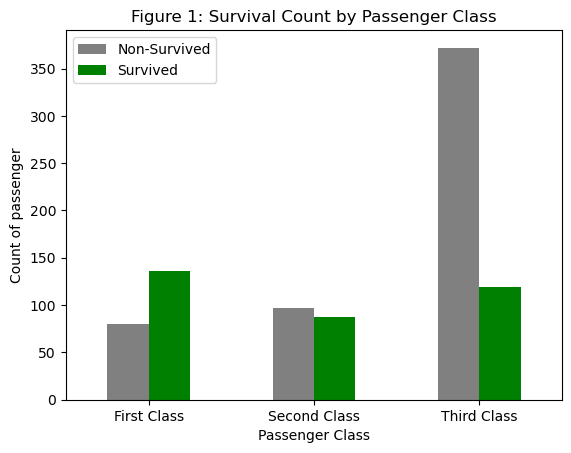

In [48]:
sur_class.plot(kind='bar', color = ['gray', 'green'] )
plt.xlabel('Passenger Class')
plt.ylabel('Count of passenger')
plt.title('Figure 1: Survival Count by Passenger Class')
plt.legend(['Non-Survived', 'Survived'])
plt.xticks(rotation=0)
plt.show()


From the graph, the passenger with higher class seems to have higher chance to survive compared to the lower class.
We look deeper with chi-square to confirm our observation.

In [18]:
from scipy.stats import chi2_contingency
chi2_contingency(sur_class)

Chi2ContingencyResult(statistic=102.88898875696056, pvalue=4.549251711298793e-23, dof=2, expected_freq=array([[133.09090909,  82.90909091],
       [113.37373737,  70.62626263],
       [302.53535354, 188.46464646]]))

The P-value is extremely low (almost 0) which mean that we can accept that there is a significant relationship between Passenger class and their survival rate. 

Additionaly, with Dof = 2, the Decision point will be 5.99, which is much lower than the chi-squared statisstic is 102.889. we can conclude that Passenger class and Survival rate are dependent, and there is a significant relationship between these variables.


## Hypothesis 2: Determine if the survival rate is associated to the gender

Plot the survival rate by gender

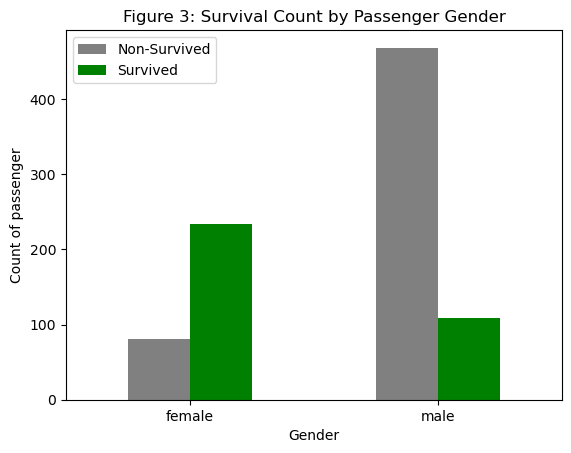

In [26]:
surv_by_gender.plot(kind='bar', color = ['gray', 'green'] )
plt.xlabel('Gender')
plt.ylabel('Count of passenger')
plt.title('Figure 3: Survival Count by Passenger Gender')
plt.legend(['Non-Survived', 'Survived'])
plt.xticks(rotation=0)
plt.show()

Female seems to have significantly higher survival rate than male passengers.

In [27]:
table_gender  = pd.crosstab(data['Sex'], data['Survived'])
table_gender

Survived,Not Survived,Survived
Sex,,
female,81,233
male,468,109


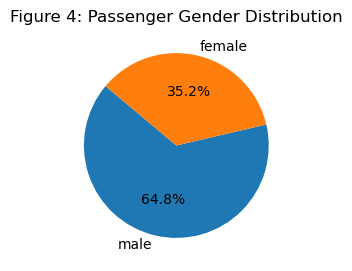

In [28]:
table_gender = data['Sex'].value_counts()
plt.figure(figsize=(6, 3))
plt.pie(table_gender, labels = table_gender.index, autopct='%1.1f%%', startangle=140)
plt.title('Figure 4: Passenger Gender Distribution')
plt.show()

In [15]:
chi2_contingency(table_gender)

Chi2ContingencyResult(statistic=260.71702016732104, pvalue=1.1973570627755645e-58, dof=1, expected_freq=array([[193.47474747, 120.52525253],
       [355.52525253, 221.47474747]]))

With the extremely high Chi-squared statistic (260.717) and the P-value almost as zero (1.19e-58), there is a strong relationship between passenger gender and their survival rate. Women are most likely got the help needed and survived a lot more than men on Titanic.

## Hypothesis 3: Determine the survival rate is associated to the age

Plot the distribution of ages for survival and non-survival group of passengers:

In [49]:
survivors_age = data[data['Survived'] == 1]['Age'].dropna()
nonsurvivors_age = data[data['Survived'] == 0]['Age'].dropna()

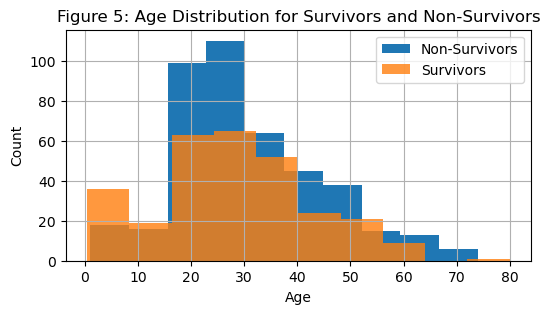

In [51]:
plt.figure(figsize= (6, 3))
plt.hist(nonsurvivors_age,  label='Non-Survivors')
plt.hist(survivors_age, alpha = 0.8, label='Survivors')

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Figure 5: Age Distribution for Survivors and Non-Survivors')
plt.legend()
plt.grid(True)
plt.show()

In [52]:
from scipy import stats
stats.mannwhitneyu(survivors_age, nonsurvivors_age)

MannwhitneyuResult(statistic=57682.0, pvalue=0.16049252477737763)

If take 0.05 as the significance levels, P-value (0.16) is higher than that. It means there is no strong evidience to support the dbifferences in ages between survivors and non-survivors

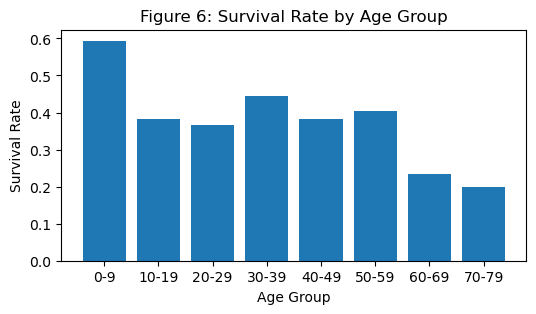

In [53]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']

data['AgeGroup'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels)

age_group_survival = data.groupby('AgeGroup')['Survived'].mean().reset_index()

plt.figure(figsize= (6, 3))
plt.bar(age_group_survival['AgeGroup'], age_group_survival['Survived'])
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.title('Figure 6: Survival Rate by Age Group')
plt.show()


In [22]:
age_group_survival

,AgeGroup,Survived
0,0-9,0.593750
1,10-19,0.382609
2,20-29,0.365217
3,30-39,0.445161
4,40-49,0.383721
5,50-59,0.404762
6,60-69,0.235294
7,70-79,0.200000


<Axes: xlabel='Survived', ylabel='Age'>

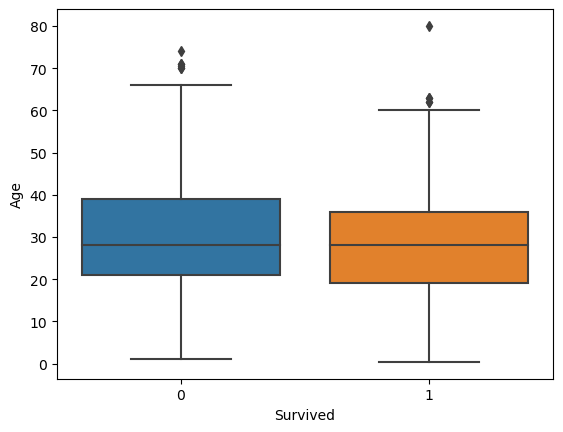

In [59]:
sns.boxplot(x="Survived", y="Age", data=data, orient = 'v')